<a href="https://colab.research.google.com/github/rkhiar/IA/blob/master/Chapter_2_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2.1: Linear Regression


*  Linear regression is a type of models that relate  ***numerical*** output to a weighted sum of ***numerical*** inputs.

* An example of linear regression is the prediction of babies  ***Height***  from their ***Age*** 



\begin{equation}
Height = w_1 Age + b + \epsilon,
\end{equation}


* where: 
    * $w_1 \in {\rm I\!R} $ designates the weight of  ***Age*** in the determination of $Height$;
    * $b \in {\rm I\!R} $ is a another weight called ***bias*** because of its invariant impact over the ouput;
    * $\epsilon$ is a tiny quantity associated to the uncertainty relevant to the  determination of  $Height$ and is often defined with a random variable.



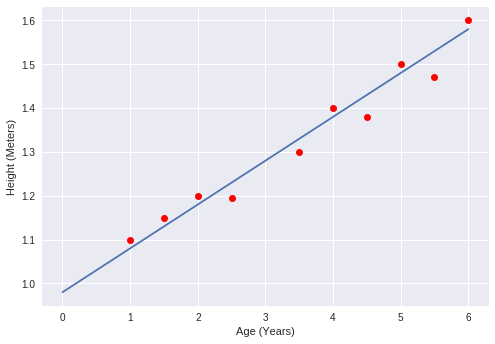

In [0]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 1.5, 2, 2.5, 3.5, 4, 4.5, 5, 5.5, 6])
Y = np.array([1.10,1.15, 1.20, 1.195, 1.30,1.40,1.38,1.50,1.47,1.60])
line_x = np.linspace(0,6)
plt.plot(X, Y, 'ro', line_x, 0.1*line_x + 0.98)
plt.xlabel('Age (Years)')
plt.ylabel('Height (Meters)')
plt.show()

*  Generally speaking we define simple linear regression between $y$ and $x$ as linear function with unknown parameters 


\begin{equation}        
y = w_1 x + b + \epsilon, \quad \epsilon \sim N(0, \sigma_{\epsilon}^2).
\end{equation}


* We are mainly interested into $w_1$ and $b$  that we package  into one array $\bf{w}$ $= [b, w_1]$.


* Removing $\epsilon$ from the above equation  turns it into a line equation with a slope of $w_1$ and an intercept $b$.


* The value of  $\bf{w}$ is  ***learned*** from a set of $n$ examples $\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots,(x^{(n)},y^{(n)})\}$ of measured inputs (Ages in our example) and associated outputs (corresponding Heights).

* The adequate values of $w_1$ and $b$ correspond to the slope and intercept of the line that best fits the set of examples  (see illustration at the figure above)

# Loss Functions 

### Mean Squared Errors Loss



*  The goodness of fit of the blue line  (defined by $\bf{w}$ $ = [b = 0.98, w_1 = 0.1]$) over the red dots is measured by a single value that summarizes the performance of the model defined by  a given set of parameters and examples. 

* The relationship between the parameters and the performance of the model is known as the ***Loss Function*** (noted $J$).

* In linear regression, $J$ is defined as the mean of the squared errors 


\begin{equation}
J(\bf{w}) = \frac{1}{n}\sum_{i = 1}^{n}({y}^{(i)} - \hat{y}^{(i)} )^2,
\end{equation}

* where $\hat{y}^{(i)} =  w_1 x^{(i)} + b$ is the output of $x^{(i)}$ obtained with  $\bf{w}$.

* Suppose intercept $b$  known and fixed at $0.98$. How would look the plot of $J(\bf{w})$ when the slope $w_1$ varies ?

 



### Pythonic Answer

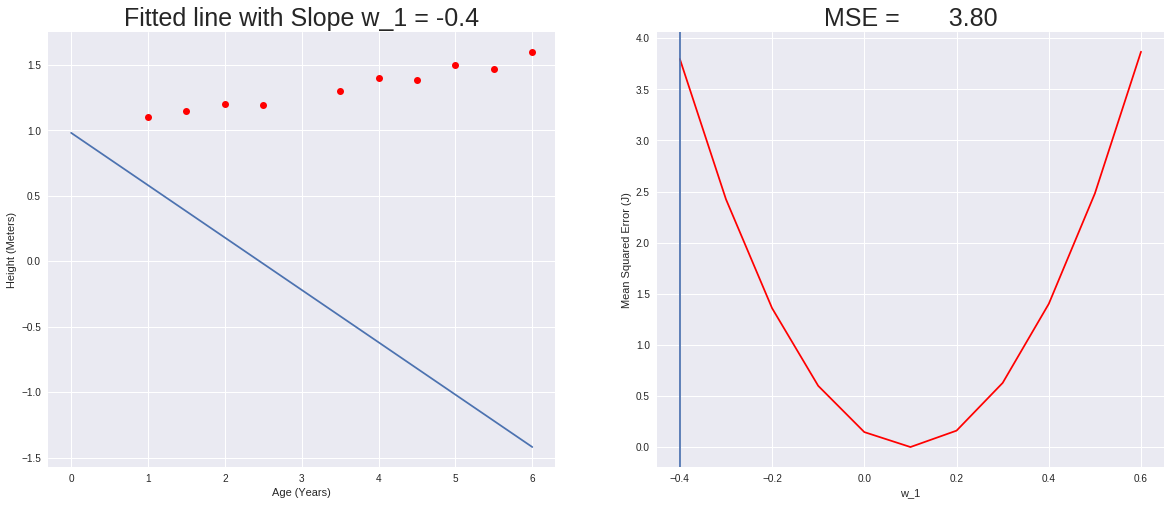

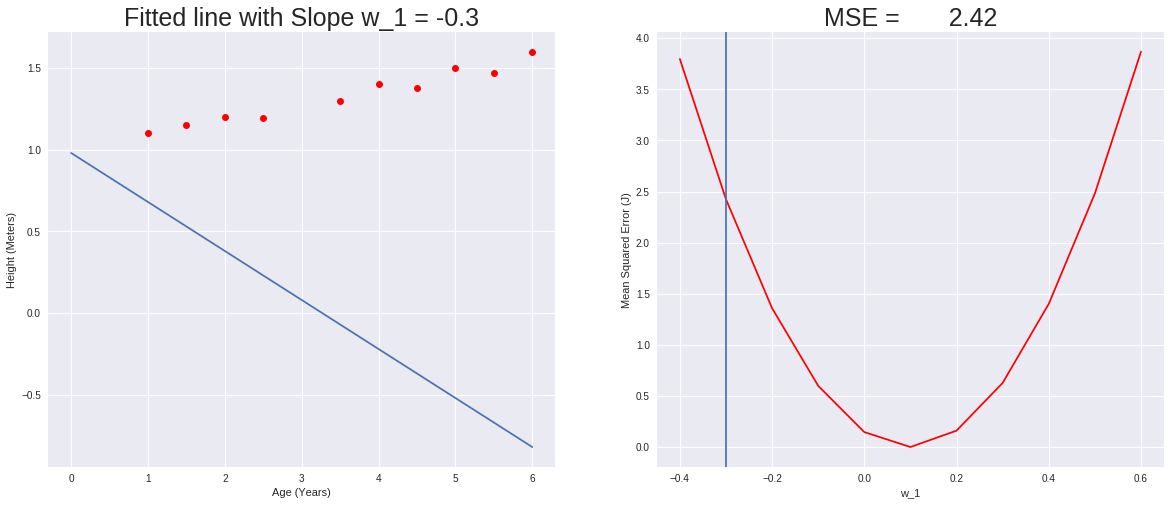

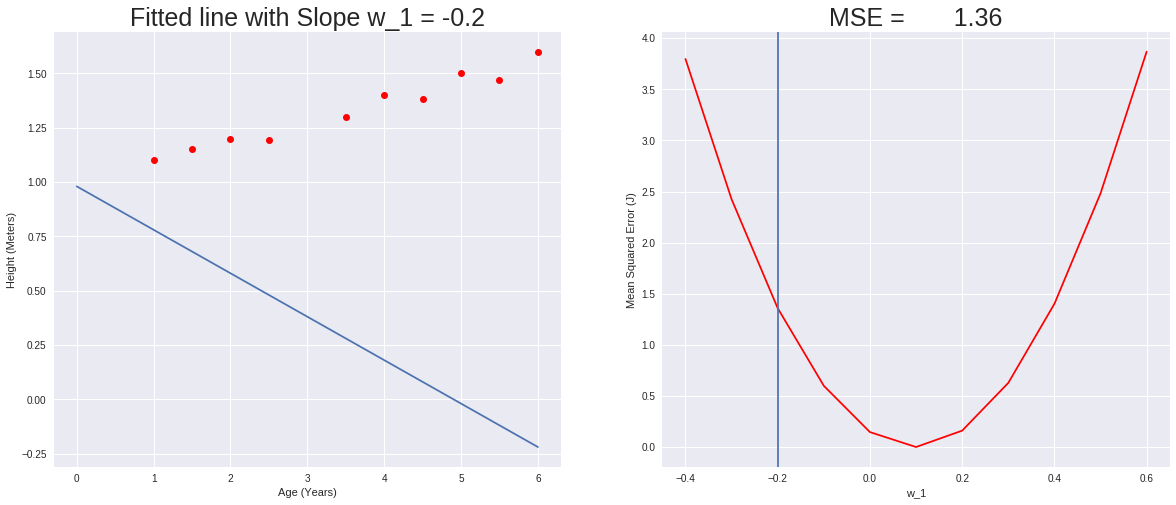

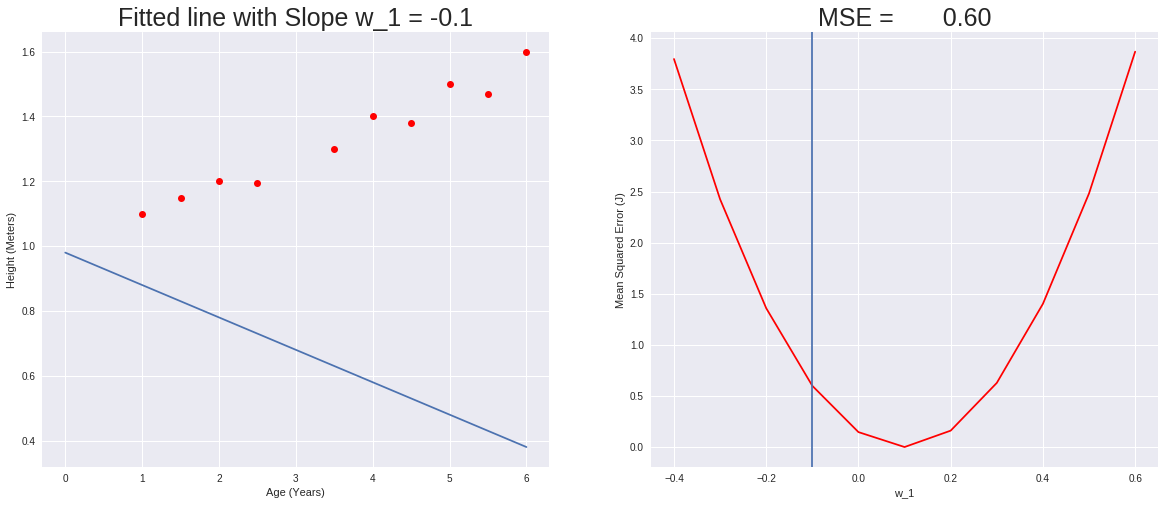

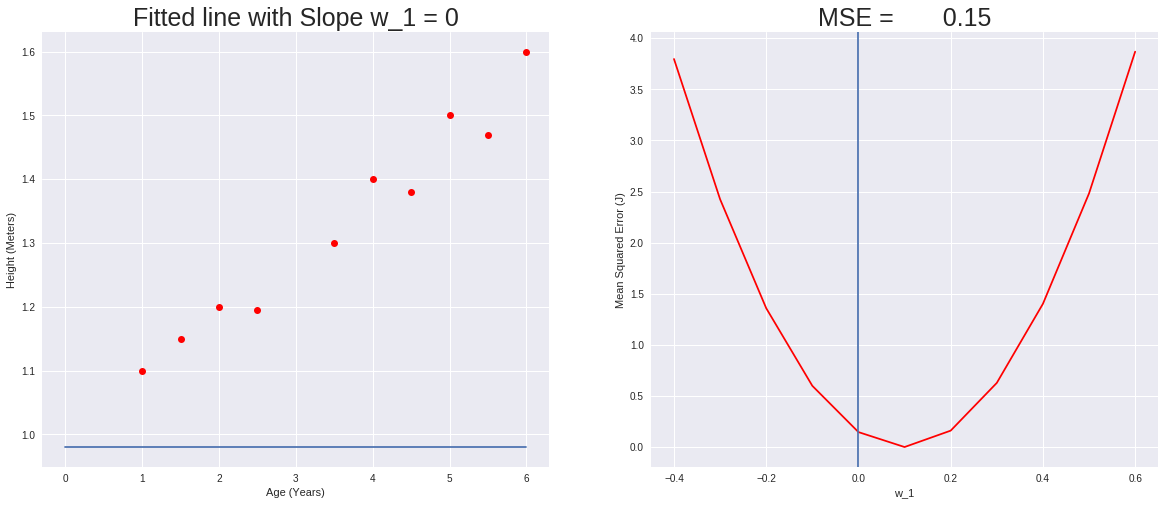

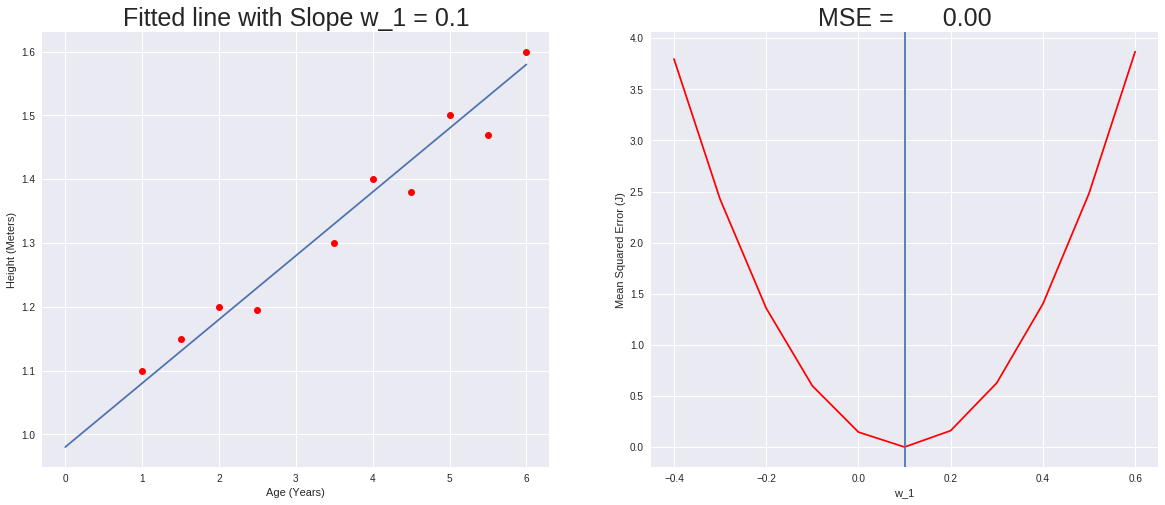

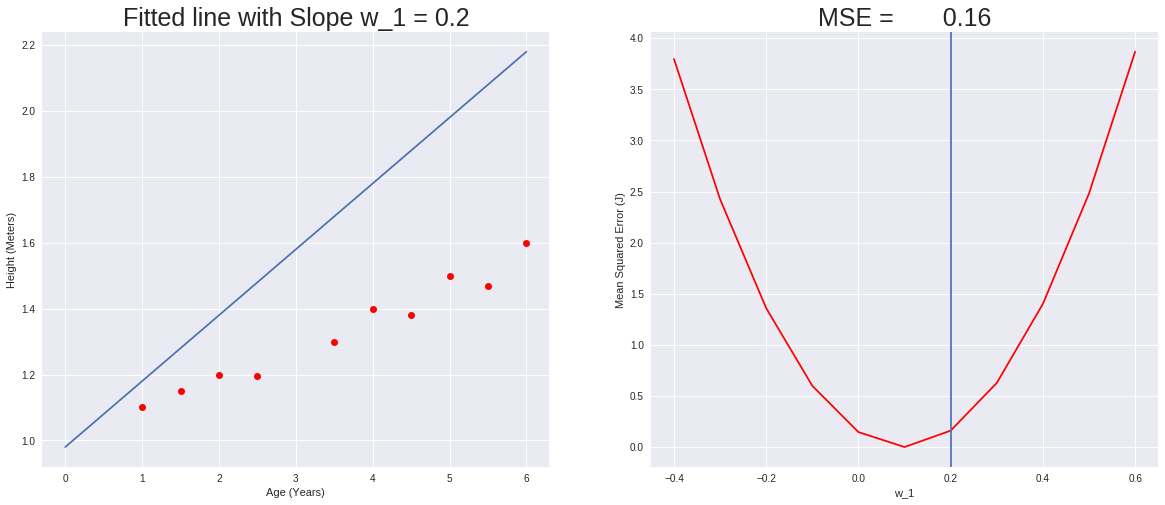

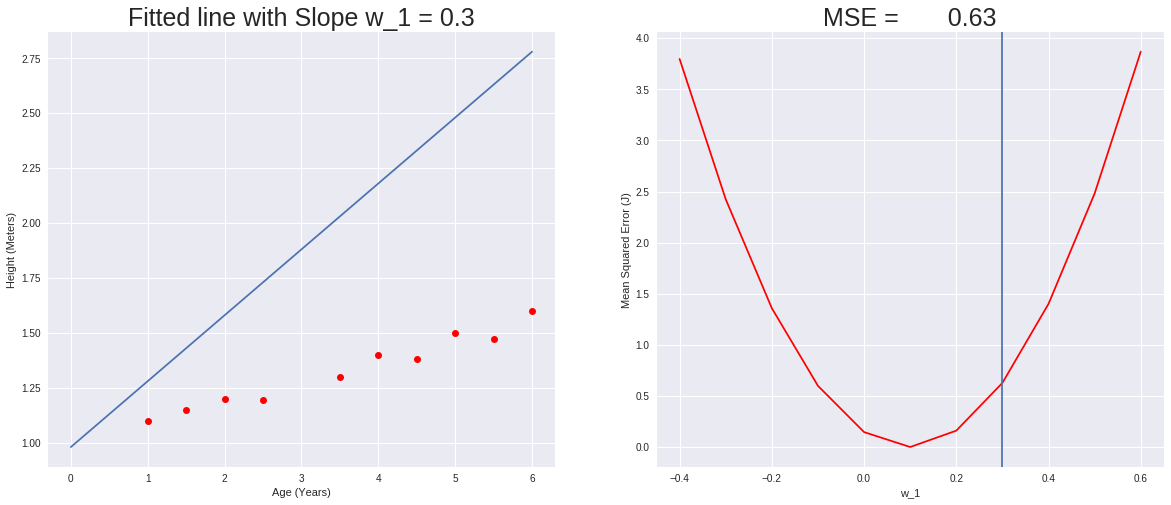

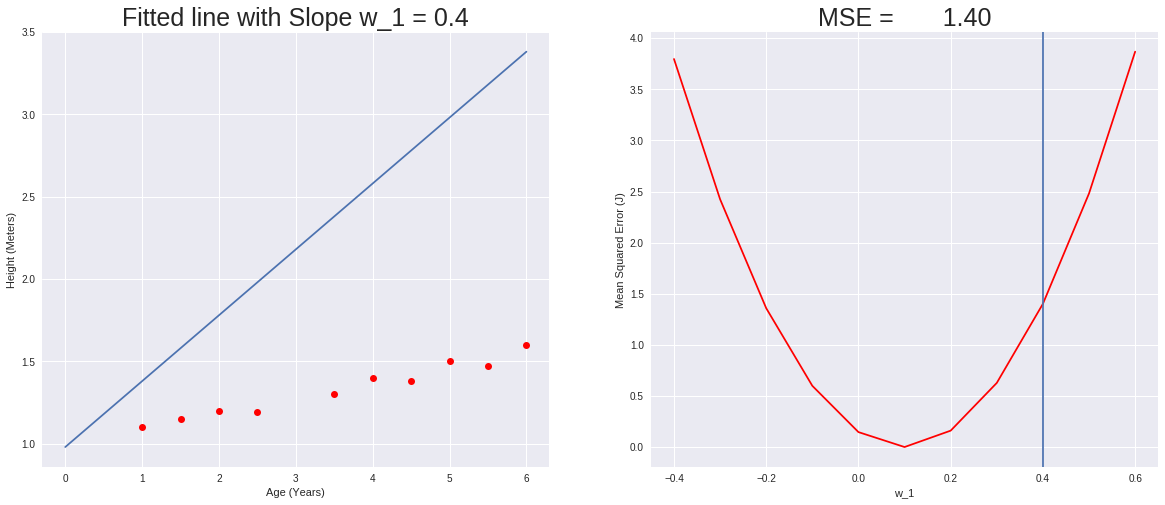

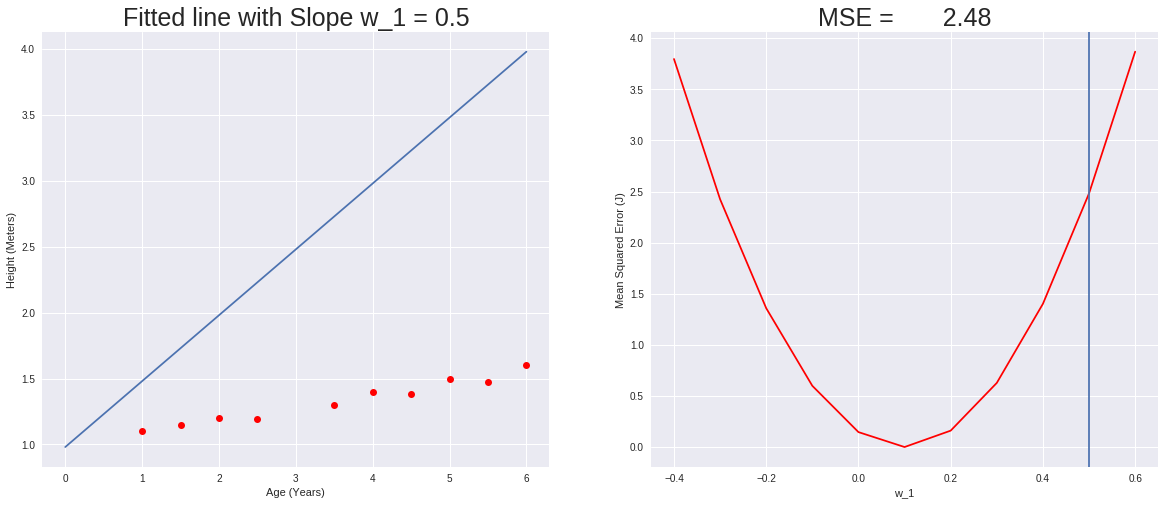

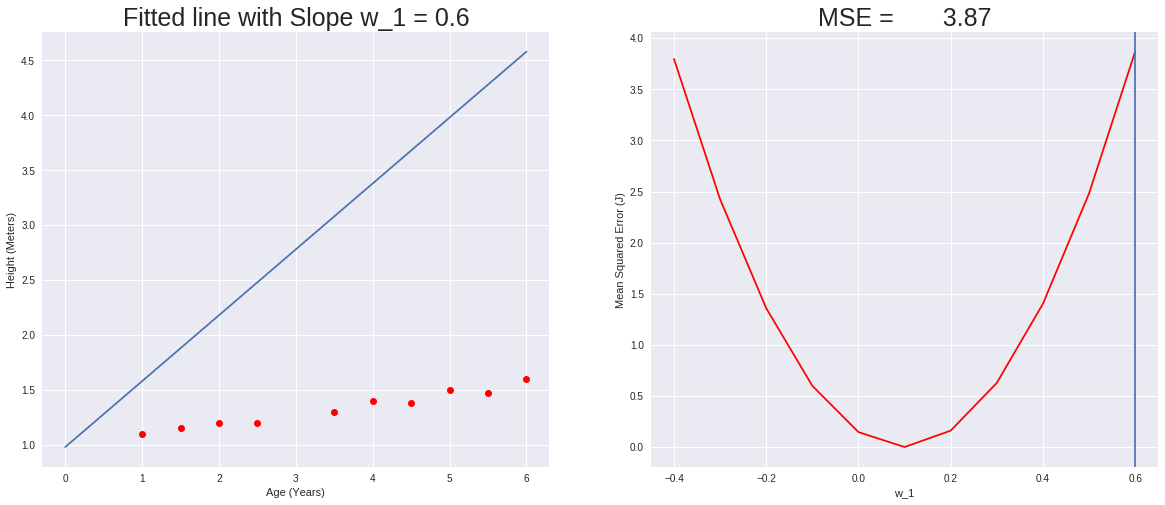

In [0]:
import time
from IPython import display

def mse(w, X, Y):
    return (1/len(X)) * np.sum(np.square(Y - (w[0] + w[1]*X)))


X = np.array([1, 1.5, 2, 2.5, 3.5, 4, 4.5, 5, 5.5, 6])
Y = np.array([1.10,1.15, 1.20, 1.195, 1.30,1.40,1.38,1.50,1.47,1.60])
w_hat = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6]
js = [mse([0.98, w_1], X, Y) for w_1 in w_hat]
line_x = np.linspace(0,6)

#while True:
#    try:
for w_1 in w_hat:

  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)

  plt.plot(X, Y, 'ro', line_x, w_1*line_x + 0.98)
  plt.xlabel('Age (Years)')
  plt.ylabel('Height (Meters)')
  plt.title('Fitted line with Slope w_1 = ' + str(w_1), fontsize=25)


  plt.subplot(1,2,2)
  plt.plot(w_hat, js, 'r')
  plt.plot()
  plt.xlabel('w_1')
  plt.ylabel('Mean Squared Error (J)')
  plt.title('MSE = ' + "{:10.2f}".format(mse([0.98, w_1], X, Y)), fontsize = 25)
  plt.axvline(x = w_1)
  #plt.show()
  time.sleep(1)
  display.display(plt.gcf())
  display.clear_output(wait=True)
#    except KeyboardInterrupt:
  display.clear_output()
#        break


# **Minimization of Loss Function:**

## Analytical Solution:



*   Recall that learning linear model $y^{(i)} = w_1 x^{(i)} +b$ from a set of inputs $\bf{x} = [x^{(1)},\ldots,x^{(n)}]$ and outputs $\bf{y} = [y^{(1)},\ldots,y^{(n)}]$ means finding the right slope and intercept $\bf{w} = [b, w_1]$ that minimize  

\begin{equation}
J(\bf{w}) = \frac{1}{n}\sum_{i = 1}^{n}(y^{(i)} -\hat{y}^{(i)} )^2.
\end{equation}





* The above linear regression can be extended to $k$ inputs  $y^{(i)} = w_1 x_1^{(i)} +\cdots + w_k x_k^{(i)} + b$.

* Let $\bf{X}$ be a matrix including all data inputs such that

\begin{equation}
\bf{X} = 
\begin{bmatrix}
    1      & x_{1}^{(1)} & \dots  & x_{k}^{(1)} \\
    1      & x_{1}^{(2)} & \dots  & x_{k}^{(2)} \\
    \vdots & \vdots & \ddots & \vdots \\
    1      & x_{1}^{(n)} & \dots  & x_{k}^{(n)}
\end{bmatrix}
\end{equation}


* The linear model can be written in the following compact form

\begin{equation}
\bf{y} = \bf{w}^T \bf{X}  \quad \mbox{where} \quad \bf{w} = [b,w_1,\ldots,w_k]^T.
\end{equation}



* The parameters vector $\bf{w}$ is analytically estimated by 

\begin{equation}
\bf{\hat{w}} = (\bf{X^{T}X})^{-1}\bf{X^T}\bf{y}
\end{equation}


### Pythonic Illustration

[0.99565657 0.0940404 ]


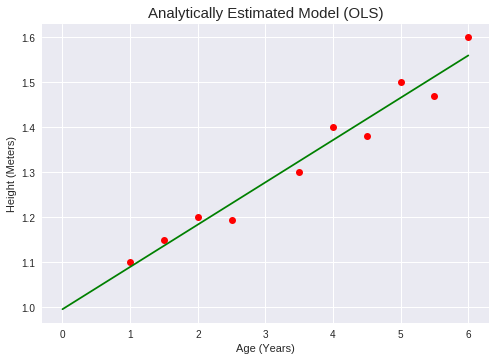

In [0]:
x = np.array([1, 1.5, 2, 2.5, 3.5, 4, 4.5, 5, 5.5, 6])
y= np.array([1.10,1.15, 1.20, 1.195, 1.30,1.40,1.38,1.50,1.47,1.60])

X = np.column_stack([np.ones(len(x)), x])

w_hat = (np.linalg.inv(X.transpose().dot(X)).dot(X.transpose())).dot(y)
print(w_hat)
line_x = np.linspace(0,6)
plt.plot(x, y, 'ro', line_x, w_hat[1]*line_x + w_hat[0], 'g')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Meters)')
plt.title('Analytically Estimated Model (OLS)', fontsize = 15)
plt.show()


## Gradient-Based Optimization 

     






*  In huge datasets,  analytical solutions become numerically impractical (because computation cost relevant to matrix inversions) .

*  Iterative methods are good alternative namely the ***Gradient-Based*** approaches.

* Gradient-Based Optimization are methods that minimize Loss Function $J$ by iteratively tweaking parameters $\bf{w}$.

* Tweaking  $w_j \in \bf{w}$ means altering its value either up or down.

* To define the direction into which $w_j$ is going to be tweaked (to minimize $J$) we use  calculus concept called ***derivation***.


### Derivation 

* Let $f(x)$ be a real function differentiable at every $x \in{\rm I\!R}$. We define $\frac{d}{dx}$ as the derivative operator applied to  $f$ with respect to $x$ such that

\begin{equation}
\frac{df(x)}{dx} = \underset{h \rightarrow 0}{\mbox{lim}} \frac{f(x + h) - f(x)}{h}.
\end{equation}

* The above equation produces a new function $f^{'}(x)$ that indicates for every $x$ the rate of change of $f(x)$ surrounding an ***infinitesimally small*** region near $x$.


* When $h$ is very small the function is well-approximated by a straight line and the derivative is its slope.  

* If for example $f^{'}(x) = 2x + 1$ then:
  *  $f^{'}(1) = 3$ means that if we add a very very tiny quantity $h$ (infinitesimally small)  to $1$ then $f(1+h)$ would ***increase*** by $3 h$.
  
  *  $f^{'}(-1) = -1$ means that if we add  $h$ to $-1$ then $f(-1+h)$ would ***decrease*** by $- h$.

  *  $f^{'}(\frac{-1}{2}) = 0$ means that if we add $h$ to $\frac{-1}{2}$ then $f(\frac{-1}{2}+h)$ would remain the same. 
  
* The interpretations above are valid only for ***infinitesimally small*** values of $h$.


     
### Rules of Derivation

* Let $f(x),g(x)$ be two differentiable functions and $a,b$ any two reals. Below are some basic derivation rules


  1. **Constant Rule**:
  \begin{equation}
  \frac{d}{dx}(a) = 0.
  \end{equation}


  2. ** Power Rule**:
  \begin{equation}
   \frac{d}{dx}(x^n) = n x^{n-1}.
  \end{equation}

  3. **Linearity Rules**:
  \begin{equation}
  \left [a f(x)\right]^{'} = a f^{'}(x). \\
  \left[ f(x) \pm  g(x) \right]^{'} = f^{'}(x) \pm g^{'}(x).
  \end{equation}
  

  
  4. **Product Rule**:  
  \begin{equation}
  \left[f(x) \times g(x)\right]^{'} = f^{'}(x) \times g(x) + f(x) \times g^{'}(x). 
  \end{equation}
  
  
  
  5. **Quotient Rule**:  
  \begin{equation}
  \left[\frac{f(x)}{g(x)}\right]^{'} = \frac{f^{'}(x) \times g(x) -  f(x) \times g^{'}(x))}{g^{2}(x)}.
  \end{equation}
  
  
  6. **Common Functions**:
  \begin{equation}
  \left[ \log(x) \right]^{'} = \frac{1}{x},\quad x > 0.\\
  \left[ \exp(x) \right]^{'} = \exp(x).\\
  \left[ \sin(x) \right]^{'} =  \cos(x).\\
  \left[ \cos(x)\right]^{'} = - \sin(x).\\
  \left[ tanh(x)\right]^{'} = 1 - tanh(x)^2
  \end{equation}
  
  
  7. **Chain Rule**:
  \begin{equation}
  \frac{d}{dx} \left( f(g(x))  \right) = f^{'}\left( g(x)\right) g^{'}(x).
  \end{equation}


### Gradient

* Let $y = f(x_1,\ldots,x_k)$ be a function from ${\rm I\!R}^k$ to ${\rm I\!R}$.

* We define $\frac{\partial y}{\partial x_j}$ as the ***partial derivative*** of $y$ with respect to $x_j$ which corresponds to $\frac{d}{dx_j}(y)$ where all the other $x_i,i \neq j$ are  considered constant.

* We define $\nabla_{\bf{x}}$   the gradient operator with respect to $\bf{x} = [x_1,\ldots,x_k]^T$ applied to $y$ as the vector of all partial derivatives


\begin{equation}
\nabla_{\bf{x}} y =  
\begin{bmatrix}
\frac{\partial y}{\partial x_1} \\
\frac{\partial y}{\partial x_2} \\
\vdots\\
\frac{\partial y}{\partial x_k} 
\end{bmatrix}.
\end{equation}


* Each element $\frac{\partial y}{\partial x_j}$ tells us the effect of $x_j$ on $y$ if we were to increase the value of $x_j$ by an  infinitesimally small quantity $h$. 


### Gradient Descent

* Gradient Descent is an optimization algorithm able to learn model parameters. 

* The algorithm is fed with data $\bf{X}, \bf{y}$ and iteratively updates $\bf{w}$ such that  loss function $J$ is minimized. 

* Let $w_j^{[i]}$ be the value of the $j^{th}$ parameter at the $i^{th}$ iteration and  $\delta > 0$ as the ***learning rate***.

* The value of $w_j^{[i]}$  is updated according to

\begin{equation}
w_{j}^{[i]} \leftarrow w_{j}^{[i-1]} - \delta \frac{\partial J}{\partial w_{j}^{[i-1]}}. 
\end{equation}


* In the case of a model with one parameter $w_1$ note the behaviour of the above updating rule:
  
  * If the loss function $J$  is increasing arround $w_{1}^{[i-1]}$ then the new $w_{1}^{[i]}$ will move towards the ***left*** with $\delta \frac{d}{d w_{1}^{[i-1]}} J$;
  
  * If the loss function $J$ is decreasing arround $w_{1}^{[i-1]}$ then the new $w_{1}^{[i]}$ will move towards the ***right*** with $\delta \frac{d}{d w_{1}^{[i-1]}} J$.


* The gradient descent algorithm is:
       
 * **Initialize Weights**: 
     \begin{equation}
     \bf{w^{[0]}} \leftarrow \bf{0};
     \end{equation}
     
 * **For** $i = 1,\ldots,N$:
     
      * **Compute Gradient** :
     
        \begin{equation}
      \nabla_{\bf{w}^{[i]}} J =  
      \begin{bmatrix}
      \frac{\partial J}{\partial b^{[i]}}\\
      \frac{\partial J}{\partial w_1^{[i]}}\\
      \vdots\\
      \frac{\partial J}{\partial w_k^{[i]}}
      \end{bmatrix};
      \end{equation}   
      
      * **Update Weights**:        
         \begin{equation}
         \bf{w^{[i]}} \leftarrow  \bf{w^{[i-1]}} - \delta \nabla_{\bf{w}^{[i]}} J;
        \end{equation}    
 

### Python Illustration


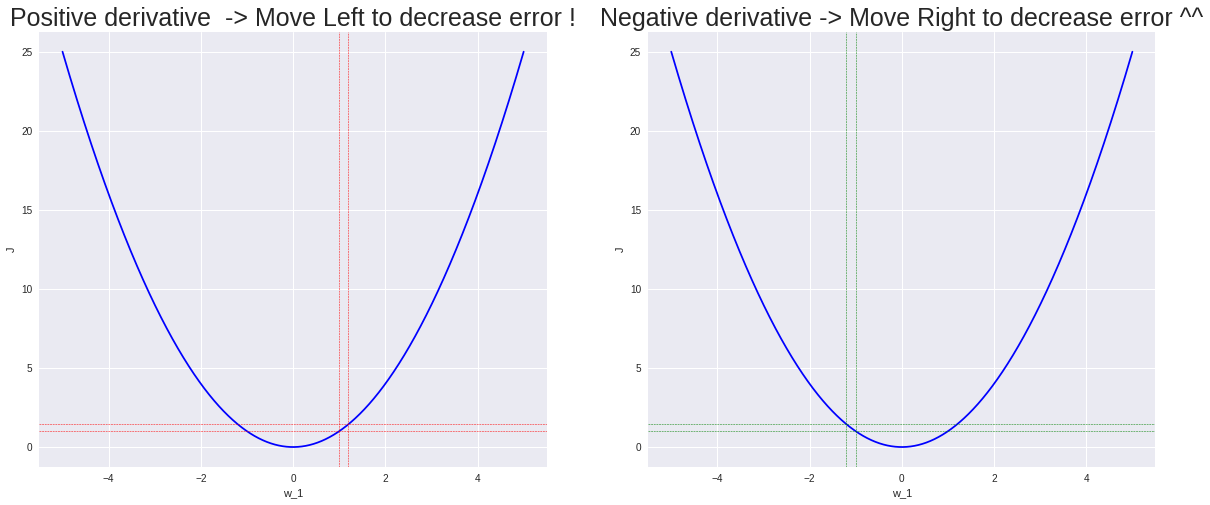

In [0]:
x = np.arange(-5,5,0.0001)
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(x, np.power(x,2), 'blue')
plt.axvline(x = 1, linestyle = '--', linewidth = 0.5,color = 'red')
plt.axvline(x = 1.2, linestyle  = '--',linewidth = 0.5, color =  'red')
plt.axhline(y = 1, linestyle = '--', linewidth = 0.5, color = 'red')
plt.axhline(y = np.power(1.2,2), linestyle = '--', linewidth = 0.5, color = 'red')
plt.xlabel('w_1')
plt.ylabel('J')
plt.title('Positive derivative  -> Move Left to decrease error !', fontsize = 25)

plt.subplot(1,2,2)
plt.plot(x, np.power(x,2), color =  'blue')
plt.axvline(x = -1, linestyle = '--', linewidth = 0.5, color =  'green')
plt.axvline(x = -1.2, linestyle  = '--',linewidth = 0.5, color =  'green')
plt.axhline(y = 1, linestyle = '--', linewidth = 0.5, color =  'green')
plt.axhline(y = np.power(1.2,2), linestyle  = '--',linewidth = 0.5, color =  'green')
plt.xlabel('w_1')
plt.ylabel('J')
plt.title('Negative derivative -> Move Right to decrease error ^^', fontsize = 25)
plt.show()


## Gradient Descent on Mean Squared Error Loss Function 



* We would like to implement Gradient Descent algorithm to estimate linear models with $2$ parameters through a mean squared error loss function.

* Before we compute the gradient of $J$ w.r.t $\bf{w}$ let us decompose $J$ as a sum of quadratic differences

\begin{equation}
J(\bf{w}) = \frac{1}{n}\sum_{i = 1}^{n}(\hat{y}^{(i)} - y^{(i)} )^2 = \frac{1}{n}\left[(w_1 x_1^{(1)} + b - y^{(1)} )^2 + \cdots + (w_1 x_1^{(n)} + b - y^{(n)} )^2 \right].
\end{equation}

* To get the partial derivatives we respectively apply the linearity, power then chain derivative rules
\begin{equation}
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i = 1}^{n} \left(b + w_1x^{(i)} - y^{(i)}\right).\\
\frac{\partial J}{\partial w_1}  = \frac{2}{n} \sum_{i = 1}^{n} \left( {x_1^{(i)}}^2w_1 + bx_1^{(i)} -y^{(i)}  x_1^{(i)}\right).\\
\end{equation}


* Now we can write the parameter update rule
\begin{equation}
\bf{w}^{[i]} \leftarrow \bf{w}^{[i-1]} - \delta 
\begin{bmatrix}
\frac{2}{n} \sum_{i = 1}^{n} \left(b + w_1x^{(i)} - y^{(i)}\right)\\
\frac{2}{n} \sum_{i = 1}^{n} \left( {x_1^{(i)}}^2w_1 + bx_1^{(i)} -y^{(i)}  x_1^{(i)}\right)
\end{bmatrix}.
\end{equation}

* Let's program it !



### Pythonic Gradient Descent

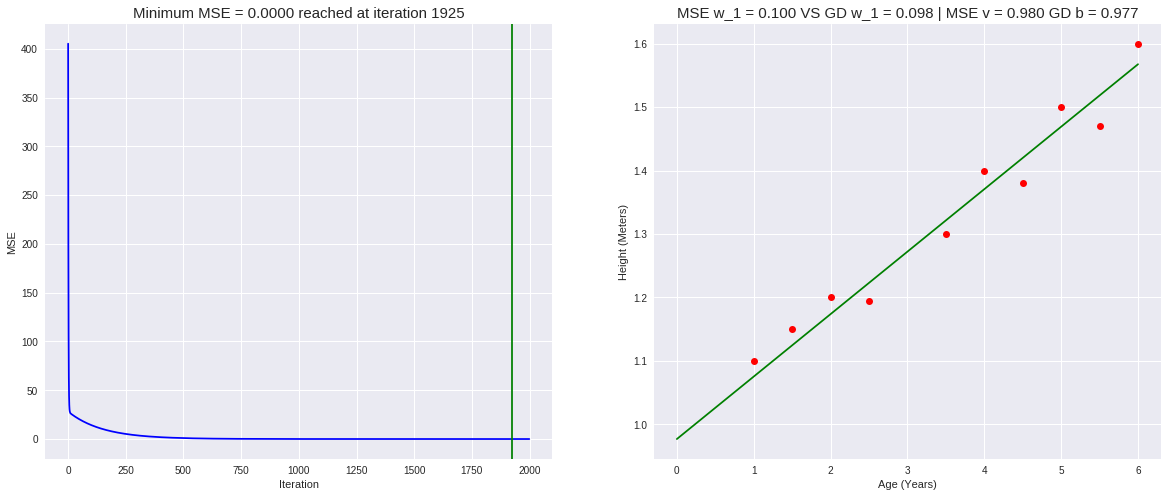

In [0]:
import numpy as np
import decimal
import matplotlib.pyplot as plt

def gradient_J(X,y,w):
    return(np.array([
            (2/len(X))*np.sum((w[0]) + (w[1]*X[:,1]) - y),
            (2/len(X))*np.sum((np.power(X[:,1],2)*w[1]) - (y*X[:,1]) + (w[0]*X[:,1]))
                   ]))

def mse(w, X, Y):
    return (1/len(X)) * np.sum(np.square(Y - (w[0] + w[1]*X)))

decimal.getcontext().rounding = decimal.ROUND_DOWN   

x = np.array([1, 1.5, 2, 2.5, 3.5, 4, 4.5, 5, 5.5, 6])
X = np.column_stack([np.ones(len(x)), x])
y= np.array([1.10,1.15, 1.20, 1.195, 1.30,1.40,1.38,1.50,1.47,1.60])
w = np.array([-10,10]) 
N = 2000
mse_track = np.zeros(N)
w_track = np.zeros([N,2])
delta = 0.01


for i in range(0, N):
    w = w - delta * gradient_J(X,y,w)
    mse_track[i] = mse(w, X[:,1], y)
    w_track[i] = w

mse_track = np.array([float(round(decimal.Decimal(mse),3)) for mse in mse_track])

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
idx_min = np.argmin(mse_track)
plt.plot(np.arange(0,N), mse_track, 'blue')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Minimum MSE = {:.4f} reached at iteration {}'.format(min(mse_track),idx_min+1), fontsize = 15)
plt.axvline(x = idx_min, color = 'green')

  
plt.subplot(1,2,2)
line_x = np.linspace(0,6)
w_hat = w_track[idx_min]
plt.plot(x, y, 'ro', line_x, w_hat[1]*line_x + w_hat[0], 'g')
plt.xlabel('Age (Years)')
plt.ylabel('Height (Meters)')
plt.title('MSE w_1 = {:.3f} VS GD w_1 = {:.3f} | MSE v = {:.3f} GD b = {:.3f}'.format(0.1, w_hat[1], 0.98, w_hat[0]), fontsize = 15)
plt.show()